In [2]:
# import libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# import cleaned dataset

df=pd.read_csv("New_clean_data.csv")
df


,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,170,0,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,445,2,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,1140,2,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,325,1,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,285,1,No info,13302
...,...,...,...,...,...,...,...,...
9664,SpiceJet,2019-05-21,Banglore,Delhi,160,0,No check-in baggage included,3257
9665,Air Asia,2019-04-09,Kolkata,Banglore,150,0,No info,4107
9666,Air India,2019-04-27,Kolkata,Banglore,155,0,No info,4145
9667,Vistara,2019-03-01,Banglore,New Delhi,160,0,No info,12648


# Distribusion of Ticket Price

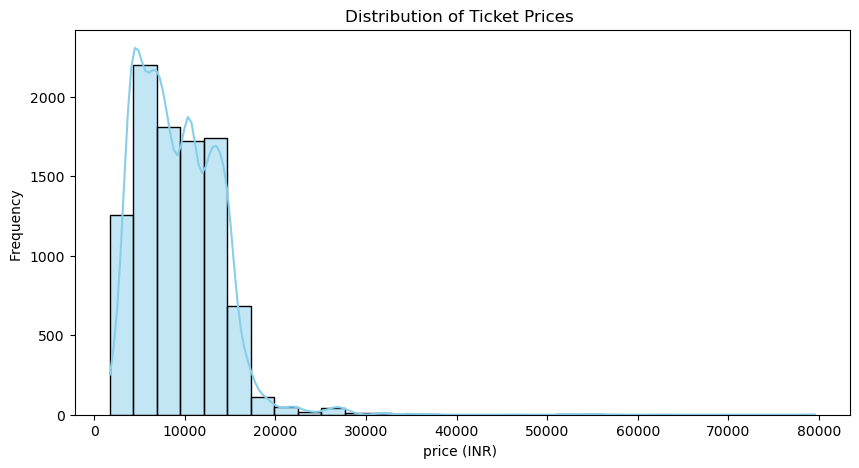

In [4]:
plt.figure(figsize=(10,5))
sns.histplot(df['Price'],bins=30,kde =True,color='skyblue')
plt.title("Distribution of Ticket Prices ")
plt.xlabel("price (INR) ")
plt.ylabel("Frequency ")
plt.show()

# Ticket by Airline

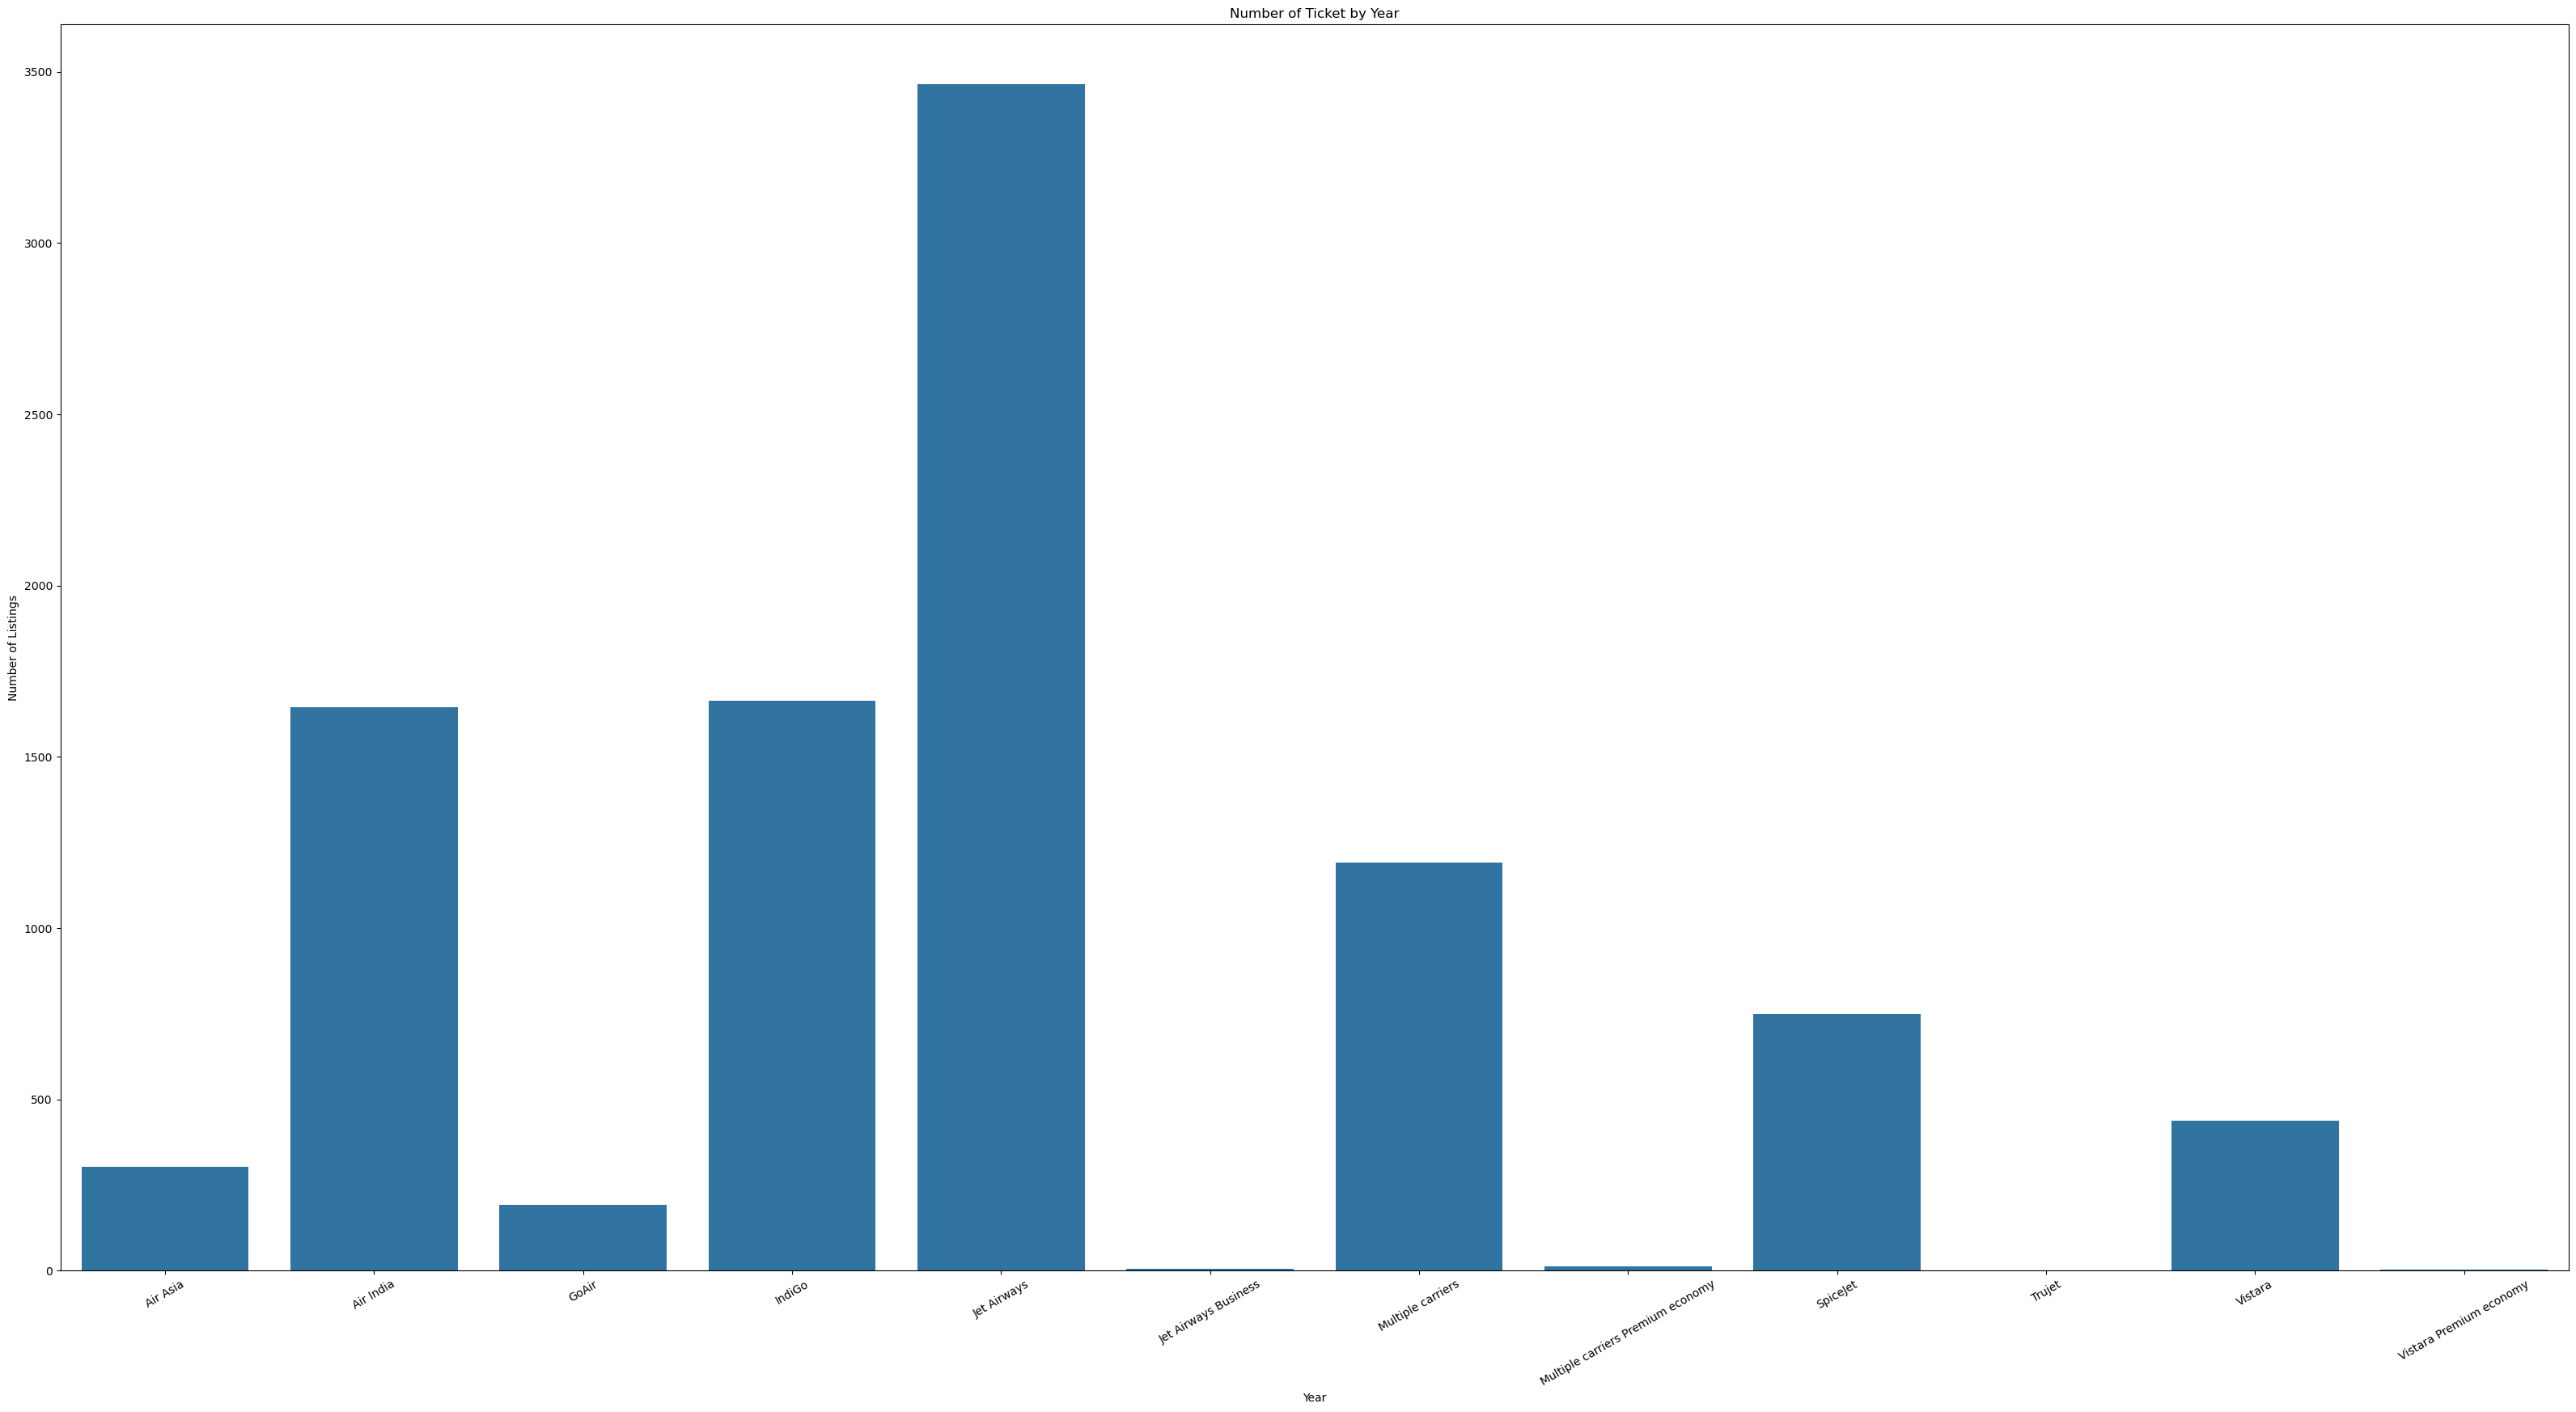

In [5]:

plt.figure(figsize=(40,20))
sns.countplot(data=df,x='Airline',order=sorted(df['Airline'].unique()))
plt.xticks(rotation=30)
plt.title("Number of Ticket by Year")
plt.xlabel("Year")
plt.ylabel("Number of Listings")
plt.show()

Interpretation :The majority of tickets in the dataset are booked with Jet Airways, making it the most frequent airline by a large margin.

# Total Stops

<Axes: xlabel='Total_Stops', ylabel='count'>

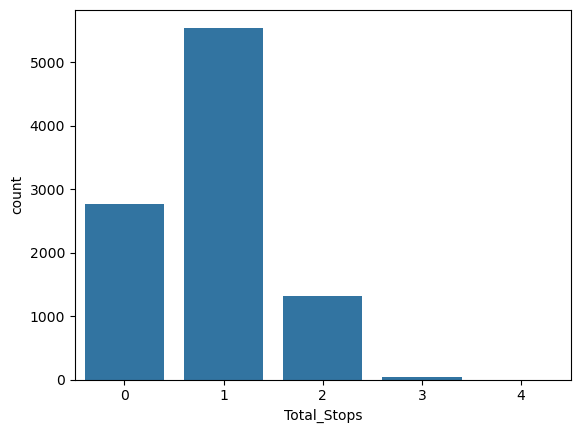

In [18]:
sns.countplot(x='Total_Stops', data=df)


Interpretation : Most flights tend to be 1 stop.
                Flights with more stops may have lower prices (but less duration)

# Duration Vs.Price



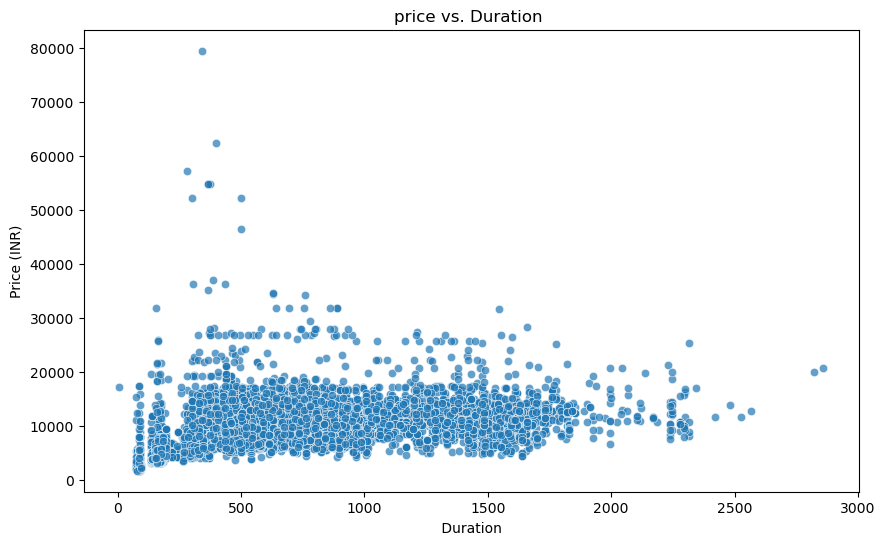

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Duration',y='Price',alpha=0.7)
plt.title("price vs. Duration ")
plt.xlabel(" Duration ")
plt.ylabel("Price (INR)")
#plt.legend(title="Fuel Type ")
plt.show()

Interpretation :As Duration increases, the Price does not consistently increase.Prices are widely spread across all durations, which suggests that other factors (like airline, stops, demand) play a bigger role in determining price.


# Top 10 Listed AirPlane Airline

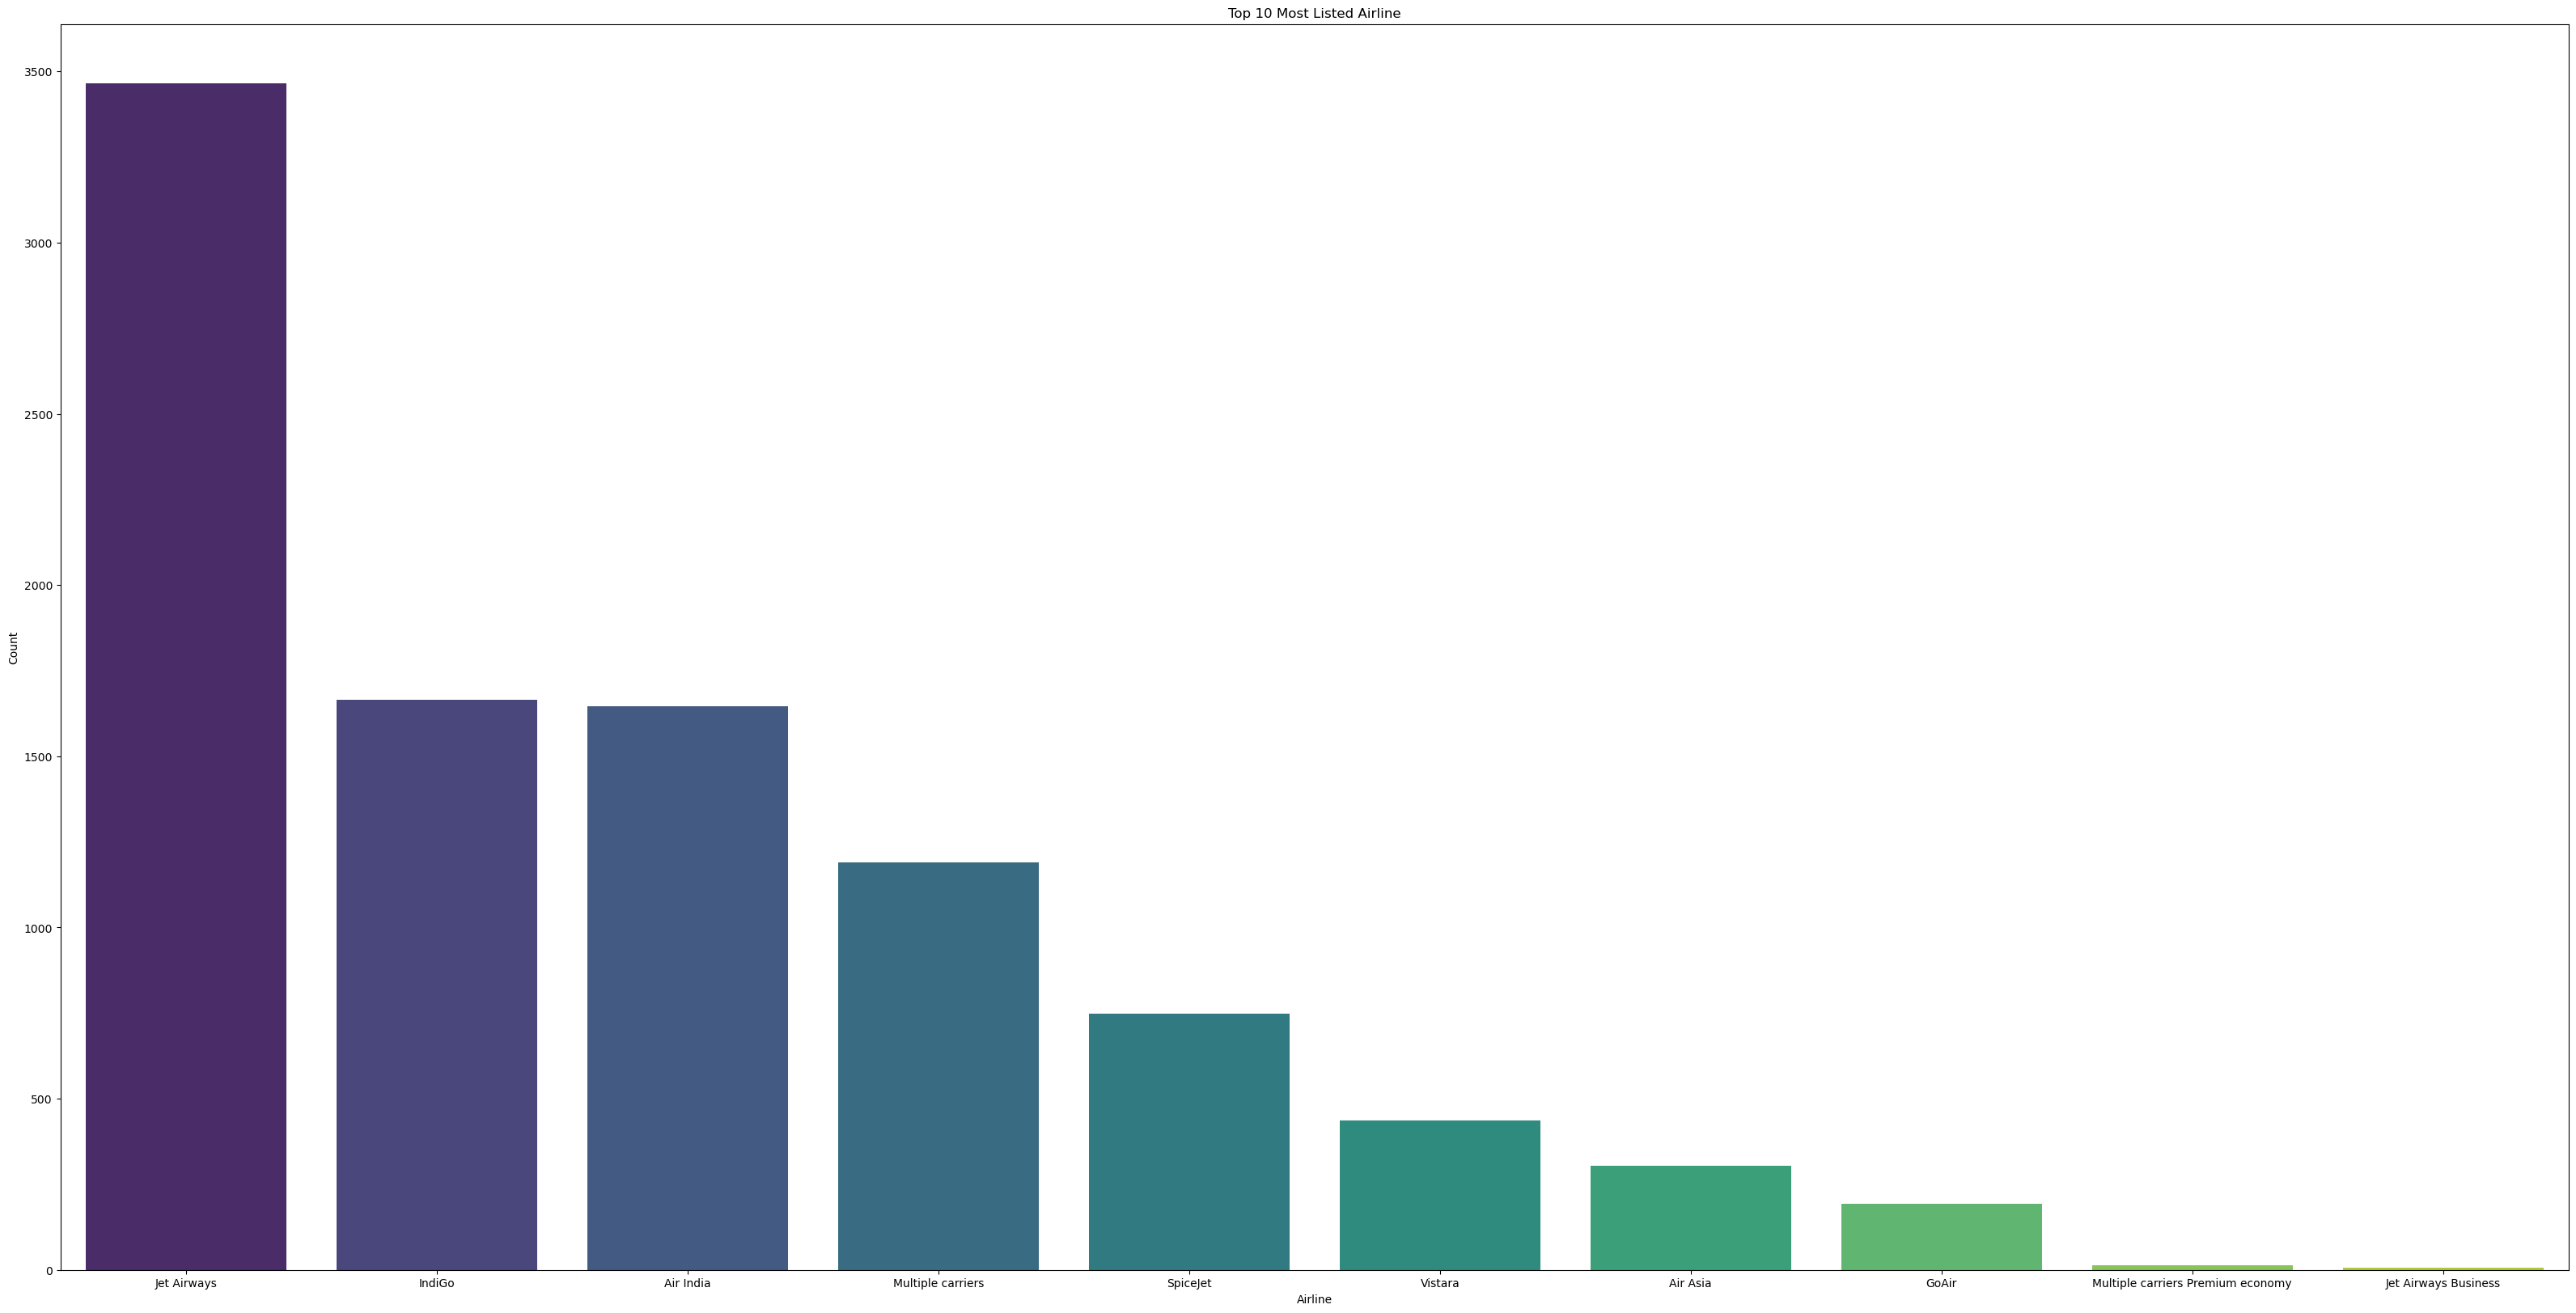

In [9]:

top_brands =df['Airline'].value_counts().head(10)

plt.figure(figsize=(40,20))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')
plt.title("Top 10 Most Listed Airline")
plt.xlabel("Airline")
plt.ylabel("Count")
plt.show()

Interpretation: Jit Airway is top 1 airline for travel by plane.

# Price Comparison of Top Airline

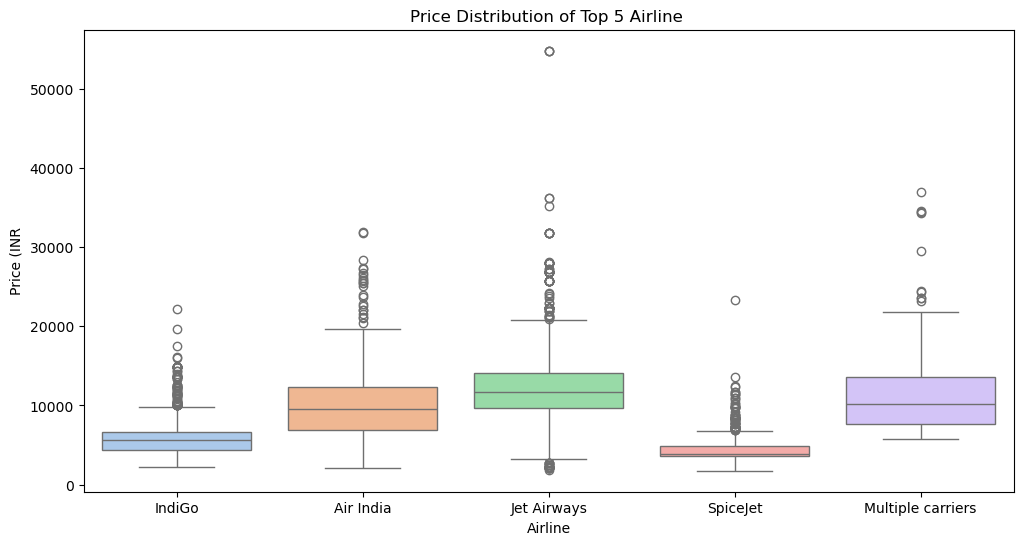

In [24]:
top5 =  df['Airline'].value_counts().head(5).index
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['Airline'].isin(top5)], x='Airline',y='Price', palette='pastel')
plt.title("Price Distribution of Top 5 Airline ")
plt.xlabel("Airline")
plt.ylabel("Price (INR")
plt.show()


Interpretation :Jet Airways has the highest median ticket price and the widest spread, indicating it is generally more expensive and variable than others.
IndiGo and SpiceJet show lower median prices and tighter distributions, suggesting they are more budget-friendly and consistent.




# Source and Destination

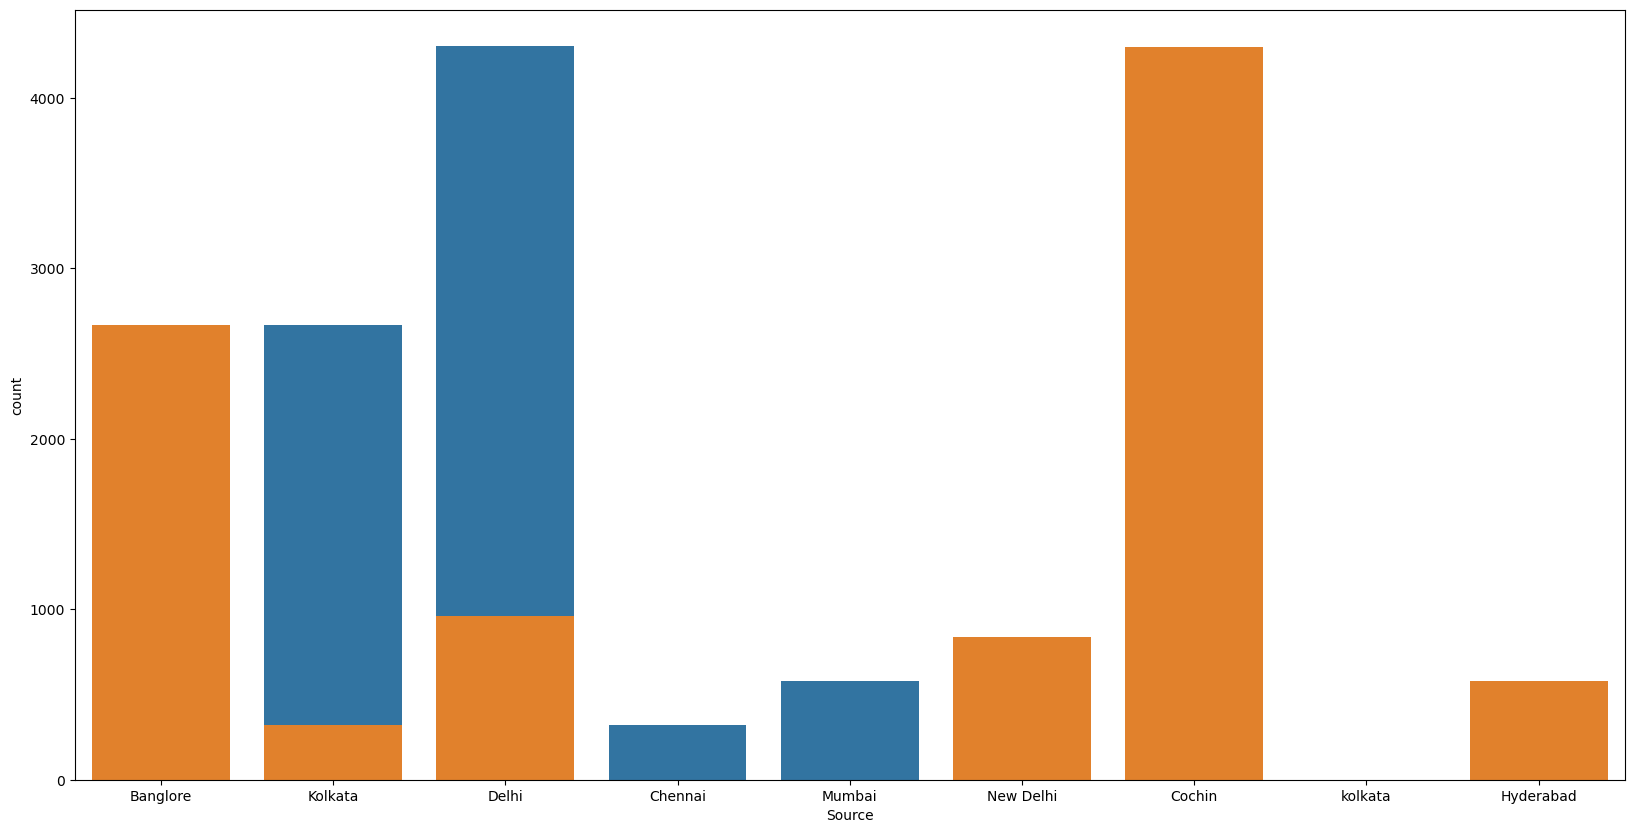

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(x='Source', data=df)
sns.countplot(x='Destination', data=df)
plt.show()

Interpretation :Most flights depart from City A and arrive at City B.Cities with low counts might have unstable price patterns due to fewer data points.



# Corralatonal Heatmap

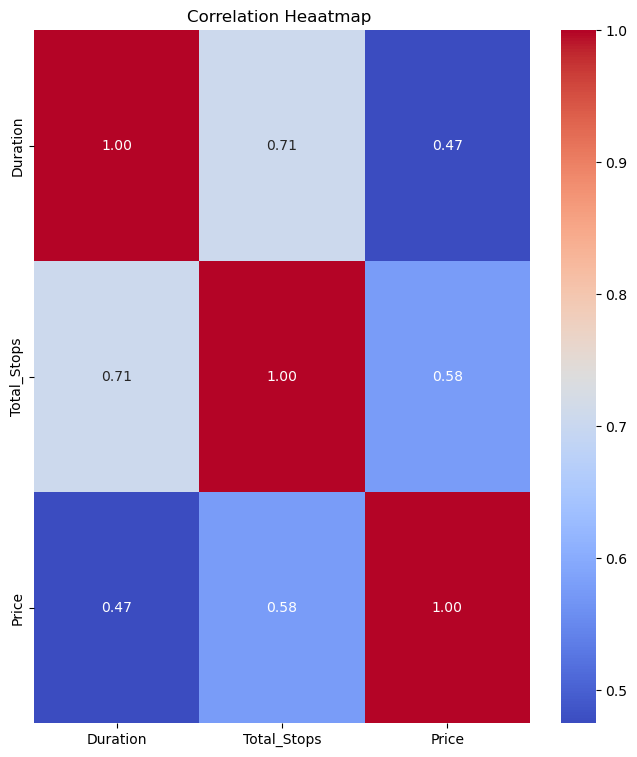

In [15]:
plt.figure(figsize =(8,9))
numeric_cols =df.select_dtypes(include ='number')
corr_matrix =numeric_cols.corr()

sns.heatmap(corr_matrix, annot =True, cmap ='coolwarm', fmt=".2f")
plt.title("Correlation Heaatmap ")
plt.show()